# 1. Introduction and Overview:
## Understanding Combinatorial Explosion in Grid-Based Problems

## 1. What is Combinatorial Explosion?
- Combinatorial explosion occurs when the number of possible combinations in a problem grows exponentially or super-exponentially with the input size. 
- In grid-based problems, this happens because each increase in grid size dramatically multiplies the number of possible configurations.

### 1.1 Real-World Impact
- Makes exhaustive search impractical for even moderate-sized problems
- Forces us to consider alternative approaches like heuristics or approximations
- This effect can be observed in many domains

## 2. A Sample Case Study: Wind Turbine Placement
- Consider placing "k" wind turbines on an N×N grid. 
- Each turbine must occupy a unique cell. 
- For the sake of simplicity, we are not considering any wake effect and other constraints. 
- This seemingly simple problem demonstrates combinatorial explosion dramatically.

### 2.1 Mathematical Foundation
The number of ways to place k turbines in an N×N grid is given by the binomial coefficient:

$$
\binom{N^2}{k} = \frac{(N^2)!}{k!(N^2-k)!}
$$

This grows super-exponentially with N, making exhaustive search infeasible for larger grids.
<div align="center">
<img src="img\fig1_comb_expl_graph.png" alt="image2" width="400px" />
</div> *Image source: Reprinted from Friedman, R. (2022). A perspective on information optimality in a neural circuit and other biological systems. Signals, 3(2), 410–427.*

# 2. Mathematical Proof of Combinatorial Explosion

   ## 2.1 Number of Ways to Place $k$ Turbines in an $N \times N$ Grid

An $N \times N$ grid has $N^2$ distinct "cells" (or "boxes"). If we wish to place $k$ turbines, **each in a different cell**, we are essentially choosing $k$ distinct positions out of those $N^2$.

* The number of ways to choose $k$ distinct items from $N^2$ items is given by the **binomial coefficient**:

$$\binom{N^2}{k} \;=\; \frac{(N^2)!}{\,k!\,\bigl(N^2 - k\bigr)!}$$

Hence, the total count of distinct layouts (placements) is:

$$\boxed{\text{Number of layouts} \;=\; \binom{N^2}{k}}$$

   ## 2.2 Rapid (Factorial/Binomial) Growth

Recall that $n!$ (factorial) grows faster than any exponential $a^n$ for fixed $a$. The binomial coefficient $\binom{N^2}{k}$ involves factorials, and for large $N$ (even moderate sizes!), these factorials get huge. As a concrete example:

* For $N=4$, we have $16$ cells and we choose $k=10$:
  $$\binom{16}{10} \;=\; 8008$$

* For $N=5$, we have $25$ cells:
  $$\binom{25}{10} \;=\; 3{,}268{,}760$$

* For $N=10$, we have $100$ cells:
  $$\binom{100}{10} \;\approx\; 1.73 \times 10^{13}$$

This number escalates **super‐exponentially** in terms of $N$. Indeed, $\binom{N^2}{k}$ grows very fast because of the factorial terms involved.

## 3. Figuring out the number of combinations that could be possible
<div align="center">
<img src="img/fig2_grid.png" alt="4x4-Grid" width="300px" />
</div>
*Image source: Grid [Digital image]. (n.d.). University of South Florida, ETC Clip Art Collection. Retrieved February 3, 2025, from https://etc.usf.edu/clipart/42600/42668/grid_42668.htm*


In [15]:
import math
import itertools
from typing import List, Tuple

def calculate_turbine_combinations(N: int, k: int) -> Tuple[int, List[List[Tuple[int, int]]]]:
    """
    Calculate possible ways to place k turbines in an N×N grid and generate example layouts.
    
    Parameters:
    -----------
    N : int
        Grid size (N×N)
    k : int
        Number of turbines to place
        
    Returns:
    --------
    Tuple[int, List[List[Tuple[int, int]]]]
        Total number of combinations and up to 5 example layouts
    """
    if N < 1:
        raise ValueError("Grid size N must be positive")
    if k < 0:
        raise ValueError("Number of turbines k must be non-negative")
    if k > N * N:
        raise ValueError(f"Cannot place {k} turbines in a {N}x{N} grid with {N*N} cells")
        
    # Calculate total combinations
    total_combinations = math.comb(N * N, k)
    
    # Generate example layouts
    grid_positions = range(N * N)
    sample_layouts = []
    
    # Only generate if total is manageable
    if total_combinations <= 1_000_000:  # Safety limit
        for i, combo in enumerate(itertools.combinations(grid_positions, k)):
            if i >= 5:  # Limit to 5 examples
                break
            # Convert to 2D coordinates
            coords = [(pos // N, pos % N) for pos in combo]
            sample_layouts.append(coords)
            
    return total_combinations, sample_layouts

def visualize_layout(N: int, layout: List[Tuple[int, int]]) -> str:
    """
    Create a string representation of a grid layout.
    """
    grid = [['.' for _ in range(N)] for _ in range(N)]
    for row, col in layout:
        grid[row][col] = 'T'
    return '\n'.join(' '.join(row) for row in grid)

# Example usage
if __name__ == "__main__":
    try:
        N, k = 4, 10  # Example case
        total, samples = calculate_turbine_combinations(N, k)
        
        print(f"Grid size: {N}x{N}")
        print(f"Number of turbines: {k}")
        print(f"Total possible combinations: {total:,}")
        
        if samples:
            print("\nFirst example layout:")
            print(visualize_layout(N, samples[0]))
                
    except ValueError as e:
        print(f"Error: {e}")

Grid size: 4x4
Number of turbines: 10
Total possible combinations: 8,008

First example layout:
T T T T
T T T T
T T . .
. . . .


## Analyzing Growth and Scaling
Let's visualize how quickly the number of combinations grows with grid size and analyze the computational feasibility of exhaustive search approaches.

- As soon as the value of N starts increasing, it is clear that this approach becacomes complicated and this implementation, will turn out to an impractical
  solution.
- Hence a brute force approach would be more time consuming and memory intensive.
- For larger grids, alternative methods (e.g., mathematical calculations or heuristic optimization) would be required

List of possible configurations
--------------------------------------------------
Grid Size    Cells    Possible Configurations  
---------------------------------------------
3x3          9        0                        
4x4          16       8,008 thousand           
5x5          25       3.3 million              
6x6          36       254.2 million            
7x7          49       8.2 billion              
8x8          64       151.5 billion            
9x9          81       1.88e+12                 
10x10         100      1.73e+13                 


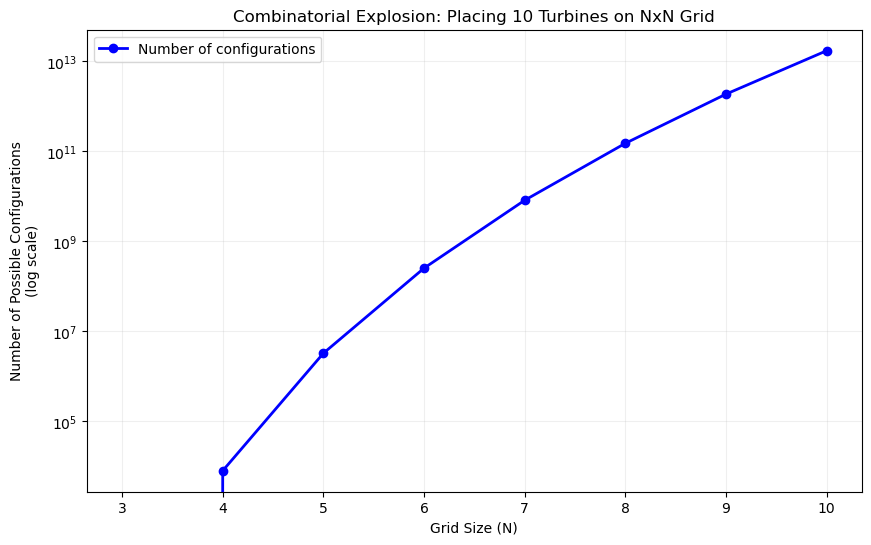

 
As you can see, this brute-force approach quickly becomes infeasible as N increases. 

The number of possible placements grows exponentially, leading to high memory usage and long computation times.


In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_combinations(N: int, k: int) -> int:
    """
    Calculate the number of possible ways to place k turbines on an NxN grid.
    
    Parameters:
    -----------
    N : int
        Size of the grid (N x N)
    k : int
        Number of turbines to place
    
    Returns:
    --------
    int : Total number of possible combinations
    """
    return math.comb(N * N, k)

def format_large_number(n: float) -> str:
    """Format large numbers in scientific notation with proper suffix."""
    if n < 1e3:
        return f"{n:,.0f}"
    elif n < 1e6:
        return f"{n:,.0f} thousand"
    elif n < 1e9:
        return f"{n/1e6:.1f} million"
    elif n < 1e12:
        return f"{n/1e9:.1f} billion"
    else:
        return f"{n:.2e}"

def demonstrate_explosion():
    """Demonstrate how quickly the number of possible configurations explodes."""
    #print("\nWind Turbine Layout - Combinatorial Explosion")
    print("List of possible configurations")
    print("-" * 50)
    
    k = 10  # Fixed number of turbines
    grid_sizes = [3, 4, 5, 6, 7, 8, 9, 10]
    
    print(f"{'Grid Size':<12} {'Cells':<8} {'Possible Configurations':<25}")
    print("-" * 45)
    
    combinations = []
    for N in grid_sizes:
        total = calculate_combinations(N, k)
        combinations.append(total)
        print(f"{N}x{N:<10} {N*N:<8} {format_large_number(total):<25}")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.semilogy(grid_sizes, combinations, 'b-o', linewidth=2, label=f'Number of configurations')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Grid Size (N)')
    plt.ylabel('Number of Possible Configurations\n(log scale)')
    plt.title(f'Combinatorial Explosion: Placing {k} Turbines on NxN Grid')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    demonstrate_explosion()

print( " ")
print("""As you can see, this brute-force approach quickly becomes infeasible as N increases. 
\nThe number of possible placements grows exponentially, leading to high memory usage and long computation times.""")
        


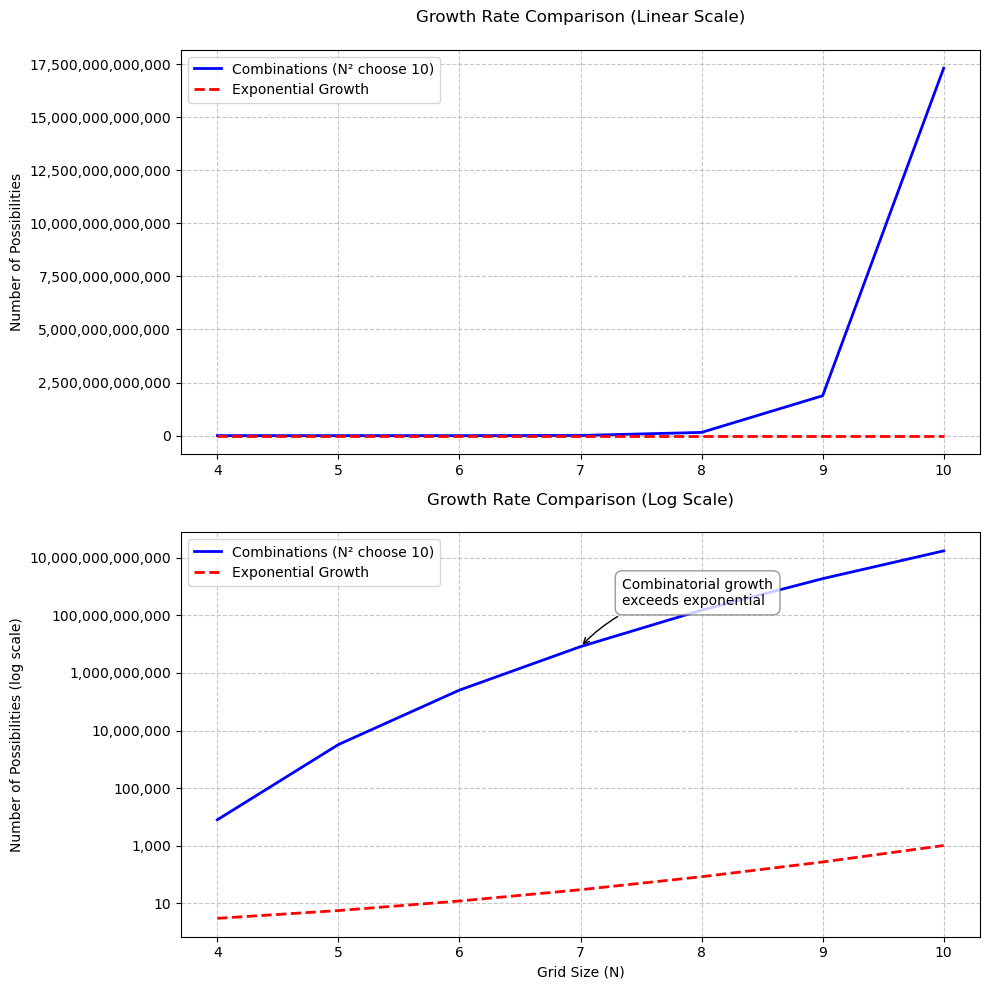


Analysis for 10x10 grid with 10 turbines:
Total combinations: 17,310,309,456,440
Estimated processing time: 2.86 weeks
Required memory: 1007.59 TB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter
from typing import Tuple, List
%matplotlib inline

def plot_growth_comparison(N_range: range, k: int) -> plt.Figure:
    """
    Detailed visualization comparing different growth rates.
    
    Parameters:
    -----------
    N_range : range
        Range of grid sizes to analyze
    k : int
        Number of turbines to place
    
    Returns:
    --------
    plt.Figure
        The generated figure containing the plots
    """
    def combinations(N: int) -> float:
        return math.comb(N * N, k)
    
    def exponential(N: int) -> float:
        return 2 ** (N * N / 10)  # Scaled for visualization
    
    # Calculate values
    N_values = np.array(list(N_range))
    combinations_values = np.array([combinations(N) for N in N_values])
    exponential_values = np.array([exponential(N) for N in N_values])
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Linear scale plot
    ax1.plot(N_values, combinations_values, 'b-', label=f'Combinations (N² choose {k})', linewidth=2)
    ax1.plot(N_values, exponential_values, 'r--', label='Exponential Growth', linewidth=2)
    ax1.set_title('Growth Rate Comparison (Linear Scale)', pad=20)
    ax1.set_ylabel('Number of Possibilities')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Log scale plot
    ax2.plot(N_values, combinations_values, 'b-', label=f'Combinations (N² choose {k})', linewidth=2)
    ax2.plot(N_values, exponential_values, 'r--', label='Exponential Growth', linewidth=2)
    ax2.set_yscale('log')
    ax2.set_title('Growth Rate Comparison (Log Scale)', pad=20)
    ax2.set_xlabel('Grid Size (N)')
    ax2.set_ylabel('Number of Possibilities (log scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    # Customize formatting
    for ax in [ax1, ax2]:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
        
    # Add annotations
    mid_point = len(N_values) // 2
    ax2.annotate('Combinatorial growth\nexceeds exponential',
                xy=(N_values[mid_point], combinations_values[mid_point]),
                xytext=(30, 30),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    
    plt.tight_layout()
    return fig

def analyze_computational_feasibility(N: int, k: int) -> dict:
    """
    Analyze the computational feasibility of enumerating all combinations.
    
    Parameters:
    -----------
    N : int
        Grid size
    k : int
        Number of turbines
    
    Returns:
    --------
    dict
        Dictionary containing analysis results
    """
    total_combinations = math.comb(N * N, k)
    
    # Assuming each combination takes 100 nanoseconds to process
    processing_time_ns = total_combinations * 100
    processing_time_seconds = processing_time_ns / 1e9

    # Convert time to human-readable format
    time_units = [("seconds", 1), ("minutes", 60), ("hours", 3600), ("weeks", 604800), 
                  ("months", 2.628e6), ("years", 3.154e7)]
    
    time_value = processing_time_seconds
    time_unit = "seconds"

    for unit, threshold in time_units:
        if processing_time_seconds >= threshold:
            time_value = processing_time_seconds / threshold
            time_unit = unit

    processing_time_human = f"{time_value:.2f} {time_unit}"

    # Memory calculation
    memory_bytes = total_combinations * 64
    units = ["Bytes", "KB", "MB", "GB", "TB"]
    size_index = 0
    memory_size = memory_bytes

    while memory_size >= 1024 and size_index < len(units) - 1:
        memory_size /= 1024
        size_index += 1

    memory_required = f"{memory_size:.2f} {units[size_index]}"
    
    return {
        'total_combinations': total_combinations,
        'processing_time': processing_time_human,
        'memory_required': memory_required
    }

# Example usage
if __name__ == "__main__":
    # Create visualization
    fig = plot_growth_comparison(range(4, 11), 10)
    plt.show()
    
    # Analyze feasibility for a specific case
    N, k = 10, 10
    analysis = analyze_computational_feasibility(N, k)
    print(f"\nAnalysis for {N}x{N} grid with {k} turbines:")
    print(f"Total combinations: {analysis['total_combinations']:,}")
    print(f"Estimated processing time: {analysis['processing_time']}")
    print(f"Required memory: {analysis['memory_required']}")


# Analysis of Wind Turbine Placement

## 1. Combinatorial Explosion: Mathematical Proof

### Basic Counting Principle

When placing $k$ turbines on an $N \times N$ grid, we are selecting $k$ distinct positions from $N^2$ possible positions. This is a combination problem where:

- Total available positions: $N^2$ (the grid size)
- Number of positions to select: $k$ (number of turbines)
- Order doesn't matter (any arrangement of the same $k$ positions is considered identical)

### Mathematical Formulation

The number of ways to choose $k$ items from $n$ items is given by the binomial coefficient:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

In our case, $n = N^2$, so the total number of possible placements is:

$$\binom{N^2}{k} = \frac{(N^2)!}{k!(N^2-k)!}$$

### Growth Rate Analysis

The growth rate of this function is super-exponential due to the factorial terms. To understand why, consider:

1. **Factorial Growth**: For any $n$, $n!$ grows faster than $a^n$ for any fixed base $a$

2. **Binomial Coefficient Growth**: $\binom{n}{k}$ grows approximately as $\frac{n^k}{k!}$ for fixed $k$

3. **Our Case**: With $n = N^2$, we get growth proportional to $\frac{(N^2)^k}{k!}$

## 3. Implications for Algorithm Design

### Why Brute Force Fails

The combinatorial explosion makes any brute-force approach infeasible because:

1. The number of combinations to check grows super-exponentially
2. Even checking a small fraction of possibilities becomes impractical
3. Memory requirements exceed practical limitations

### Alternative Approaches

Instead of exhaustive search, consider:

1. **Heuristic Methods**:
   - Genetic algorithms
   - Simulated annealing
   - Hill climbing with random restarts

2. **Mathematical Optimization**:
   - Integer linear programming
   - Constraint satisfaction problems
   - Local search algorithms



## 4. Hardware Feasibility Analysis
Let's analyze whether modern hardware could handle this combinatorial explosion. We'll use the specifications of NVIDIA's H200 GPU, one of the most powerful AI accelerators available:

- 989 TFLOPS (FP32)
- 141 GB HBM3e Memory
- 4.8 TB/s Memory Bandwidth

Even with such powerful hardware, we'll see how quickly the problem becomes intractable.

In [14]:
import math
import numpy as np

def analyze_computational_requirements(N: int, k: int = 10) -> dict:
    """
    Analyze computational requirements for wind turbine placement using NVIDIA H200 specs.
    
    Parameters:
    -----------
    N : int
        Grid size (N x N)
    k : int
        Number of turbines to place (default: 10)
        
    Returns:
    --------
    dict: Analysis results
    """
    # H200 Specifications
    H200_FLOPS = 989 * (10**12)  # 989 TFLOPS for FP32
    H200_MEMORY = 141 * (10**9)   # 141 GB in bytes
    H200_BANDWIDTH = 4.8 * (10**12)  # 4.8 TB/s
    
    # Calculate combinations
    total_combinations = math.comb(N * N, k)
    
    # Memory requirements (64 bytes per combination)
    memory_required = total_combinations * 64  # bytes
    
    # Time calculations (assuming 1000 FLOPs per evaluation)
    operations_needed = total_combinations * 1000
    processing_time = operations_needed / H200_FLOPS
    
    # Memory transfer time
    transfer_time = memory_required / H200_BANDWIDTH
    
    def format_time(seconds):
        if seconds < 60:
            return f"{seconds:.2f} seconds"
        elif seconds < 3600:
            return f"{seconds/60:.2f} minutes"
        elif seconds < 86400:
            return f"{seconds/3600:.2f} hours"
        elif seconds < 31536000:
            return f"{seconds/86400:.2f} days"
        else:
            return f"{seconds/31536000:.2f} years"
    
    def format_bytes(bytes):
        if bytes < 1024**3:
            return f"{bytes/1024**2:.2f} MB"
        elif bytes < 1024**4:
            return f"{bytes/1024**3:.2f} GB"
        else:
            return f"{bytes/1024**4:.2f} TB"
    
    return {
        "grid_size": f"{N}x{N}",
        "total_cells": N * N,
        "combinations": total_combinations,
        "memory_required": format_bytes(memory_required),
        "processing_time": format_time(processing_time),
        "transfer_time": format_time(transfer_time),
        "exceeds_memory": memory_required > H200_MEMORY,
        "combinations_readable": f"{total_combinations:,.0f}"
    }

def demonstrate_h200_limitations():
    """Demonstrate how even H200's capabilities are overwhelmed by combinatorial explosion."""
    print("\nComputational Analysis using NVIDIA H200 GPU (989 TFLOPS)")
    print("=" * 80)
    
    test_cases = [4, 5, 6, 7, 8, 9, 10, 15, 20]
    
    print(f"{'Grid Size':<10} {'Combinations':<25} {'Memory Needed':<15} {'Processing Time':<20}")
    print("-" * 80)
    
    for N in test_cases:
        analysis = analyze_computational_requirements(N)
        print(f"{analysis['grid_size']:<10} {analysis['combinations_readable']:<25} "
              f"{analysis['memory_required']:<15} {analysis['processing_time']:<20}")
        
        if analysis['exceeds_memory']:
            memory_factor = float(analysis['memory_required'].split()[0])
            if 'TB' in analysis['memory_required']:
                memory_factor *= 1024
            print(f"⚠️  Would need {memory_factor:.1f}x more memory than H200's 141 GB\n")

if __name__ == "__main__":
    demonstrate_h200_limitations()
    
    # Detailed analysis for a specific case
    N = 10
    analysis = analyze_computational_requirements(N)
    print(f"\nDetailed Analysis for {N}x{N} grid with 10 turbines:")
    print(f"Total combinations: {analysis['combinations_readable']}")
    print(f"Memory required: {analysis['memory_required']}")
    print(f"Processing time: {analysis['processing_time']}")
    print(f"Data transfer time: {analysis['transfer_time']}")


Computational Analysis using NVIDIA H200 GPU (989 TFLOPS)
Grid Size  Combinations              Memory Needed   Processing Time     
--------------------------------------------------------------------------------
4x4        8,008                     0.49 MB         0.00 seconds        
5x5        3,268,760                 199.51 MB       0.00 seconds        
6x6        254,186,856               15.15 GB        0.00 seconds        
7x7        8,217,822,536             489.82 GB       0.01 seconds        
⚠️  Would need 489.8x more memory than H200's 141 GB

8x8        151,473,214,816           8.82 TB         0.15 seconds        
⚠️  Would need 9031.7x more memory than H200's 141 GB

9x9        1,878,392,407,320         109.34 TB       1.90 seconds        
⚠️  Would need 111964.2x more memory than H200's 141 GB

10x10      17,310,309,456,440        1007.59 TB      17.50 seconds       
⚠️  Would need 1031772.2x more memory than H200's 141 GB

15x15      74,809,092,950,832,240    4354462

## 4. Conclusions and Implications

### 4.1 Key Findings
1. Even with state-of-the-art hardware, brute force approaches become impractical quickly
2. The growth rate exceeds both exponential and polynomial functions
3. Memory requirements become a bottleneck before computational time in many cases

### 4.2 Alternative Approaches
Given the infeasibility of exhaustive search, alternative approaches should be considered:

1. **Heuristic Methods**
   - Genetic algorithms
   - Sim